<a href="https://colab.research.google.com/github/11Ramya11/File1/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minor Project
Spotify Songs’ Genre Segmentation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv(r"/content/spotify_dataset.csv")

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
sort_df=df.sort_values('track_popularity',ascending=True).head(10)


In [7]:
sort_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11645,3mXBM0LLk0bemiuCHyvQ9S,El Laberinto - Live,Miguel Rios,0,5fstCqs5NpIlF42VhPNv23,Rock & Rios (Remastered),01-01-2005,Rock and Rios,2gpKfzXEi8QWvgBNPDPk5R,rock,...,11,-9.207,0,0.0590,0.0122,0.000000,0.4150,0.558,185.327,51853
18994,4EoDcHQ7lOj4RGgRibFLXh,Un Sueño,R.K.M & Ken-Y,0,0VKEkSWbmAyBEVuvlhMmas,Reggaeton Hits Factory,01-01-2007,Reggaeton Classics,37i9dQZF1DX8SfyqmSFDwe,latin,...,1,-4.959,1,0.0622,0.1570,0.033200,0.3090,0.805,95.006,245427
19127,4YAcCjGlRfpcFLyxiI54K7,No Es Culpa Mía,DY,0,6pa7ftXvhHJWLvuE4A5mLI,No Es Culpa Mía,24-05-2017,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,10,-4.337,1,0.0986,0.4370,0.000001,0.0798,0.714,94.053,107572
19160,76tsb1MlePUaN0Y3R8w0KO,Web Cam,Farruko,0,31WdDt5NcgMhHA8Uh1RZFA,The Ones,28-08-2015,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,7,-7.085,1,0.0504,0.2100,0.000000,0.3830,0.542,80.989,206639
19168,54rF7OkHKlNJFuePn7sBsJ,Sexo Seguro,"Franco ""El Gorilla""",0,0GqH0aPhP29I1yE9O7pzNt,Welcome To The Jungle,01-01-2009,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,4,-6.230,0,0.0905,0.0853,0.000000,0.1080,0.585,97.015,218507
19178,6iFgpfqV152RVIXSNfQuhj,Flow Violento,Arcangel,0,6yPjXW0WhOnJbRGl2wLtA4,Flow Violento Vol.1,11-04-2019,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,9,-6.760,1,0.1840,0.2660,0.000000,0.2370,0.925,80.018,186619
19186,3DQLEEsPTaXTKay4QtDbfC,Nuestro Amor Es Asi,Magnate,0,6HHTfrMM5EZQv7hMPGVFwq,Progresivo,01-01-2007,Reggaeton De Ayer,37i9dQZF1DWWU6Rfto8Ppm,latin,...,10,-5.127,1,0.0599,0.5050,0.000000,0.2150,0.585,94.931,177680
11457,51pvjqS1XmaObmjovRnHiL,Natsu No Owari,T-SQUARE,0,0TvVsaFDsyqHwzrJ04mjhH,Paradise,08-07-2015,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,7,-8.163,1,0.0242,0.0515,0.562000,0.1040,0.713,100.045,308867
27749,6AdD7ReUe1mk5ixLfGnSwO,Stardust,Lucas & Steve,0,1crgxyEW2xWxeb7mCamyBO,Stardust,22-09-2017,Jeff Seid Electro House,2Tisn6NZbeofpc57Oc6MGo,edm,...,8,-2.337,0,0.1580,0.0254,0.000011,0.0604,0.509,126.075,175000
27747,2gfToY9trgUdYIgPkc8zwR,Thanks A Million,Jay Hardway,0,2zVNpQs05XWyQJVOksyzYX,Thanks A Million,04-09-2017,Jeff Seid Electro House,2Tisn6NZbeofpc57Oc6MGo,edm,...,9,-9.396,1,0.0316,0.0105,0.073300,0.1660,0.455,120.010,216407


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [9]:
most_popular=df.query('track_popularity>90',inplace=False).sort_values('track_popularity',ascending=False).head(10)

In [10]:
most_popular[:10]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17-10-2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,17-10-2019,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10-10-2019,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10-10-2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10-10-2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,10-10-2019,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
18756,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,07-11-2019,Baila Reggaeton,37i9dQZF1DWY7IeIP1cdjF,latin,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,06-12-2019,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23103,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,07-11-2019,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960
18330,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,06-09-2019,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280


In [11]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [12]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df.set_index('track_album_release_date', inplace=True)
df.index = pd.to_datetime(df.index)

<ipython-input-12-78d8999f5f04>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')


In [13]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_album_release_date,,,,,,,,,,,,,,,,,,,,,
2019-06-14,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
2019-12-13,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2019-05-07,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
2019-07-19,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
2019-05-03,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [14]:
df['duration']=df['duration_ms'].apply(lambda x: round(x/1000))
df.drop('duration_ms',inplace=True,axis=1)

In [15]:
df.duration.head()

track_album_release_date
2019-06-14    195
2019-12-13    163
2019-05-07    177
2019-07-19    169
2019-05-03    189
Name: duration, dtype: int64

In [16]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration'],
      dtype='object')


In [17]:
selected_columns = [
    "track_popularity", "danceability", "energy",  "loudness",
    "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo","key","mode","duration"
]
df1=df[selected_columns]
df1

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration
track_album_release_date,,,,,,,,,,,,,
2019-06-14,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,6,1,195
2019-12-13,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,11,1,163
2019-05-07,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,1,0,177
2019-07-19,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,7,1,169
2019-05-03,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,1,1,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-28,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,2,1,204
2013-08-03,20,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0,1,353
2014-04-21,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,6,0,210


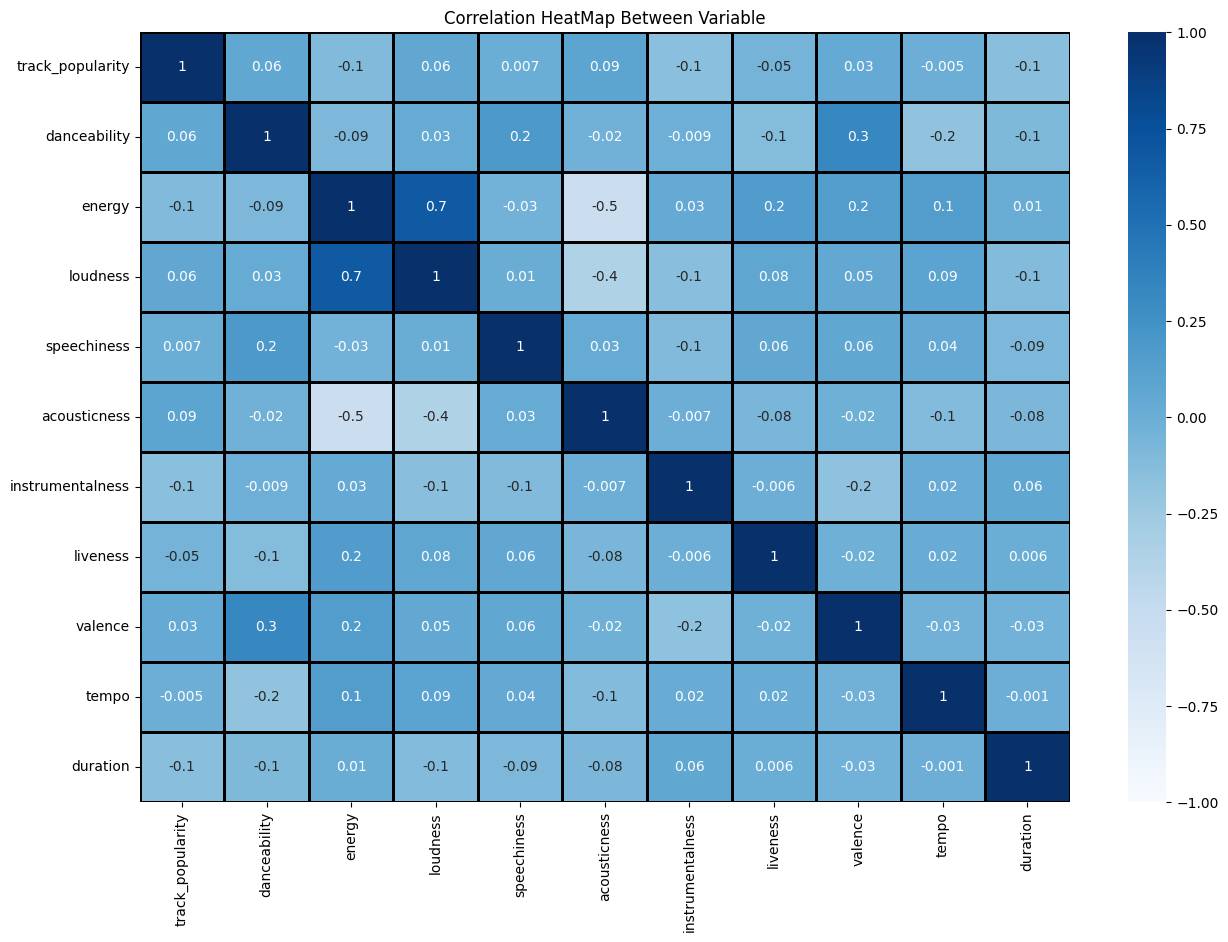

In [18]:
# Data Analysis and Visualization based on Playlist_name
corr_df =df1.drop(['key','mode'],axis=1).corr(method="pearson")
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(corr_df,annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap="Blues",linewidths=1,linecolor="Black")
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)
plt.show()

In [19]:
sample_df=df.sample(int(0.004*len(df)))
print(len(sample_df))

131


[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

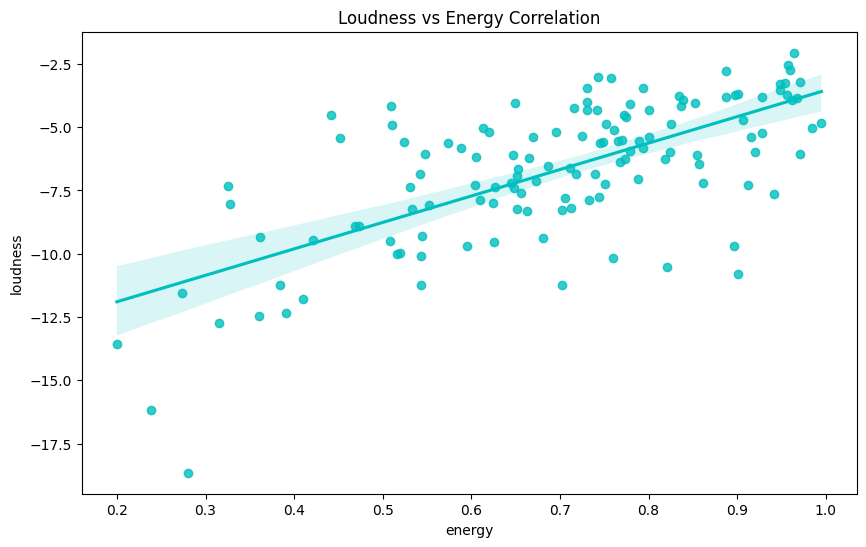

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy",color="c").set(title="Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation Map')]

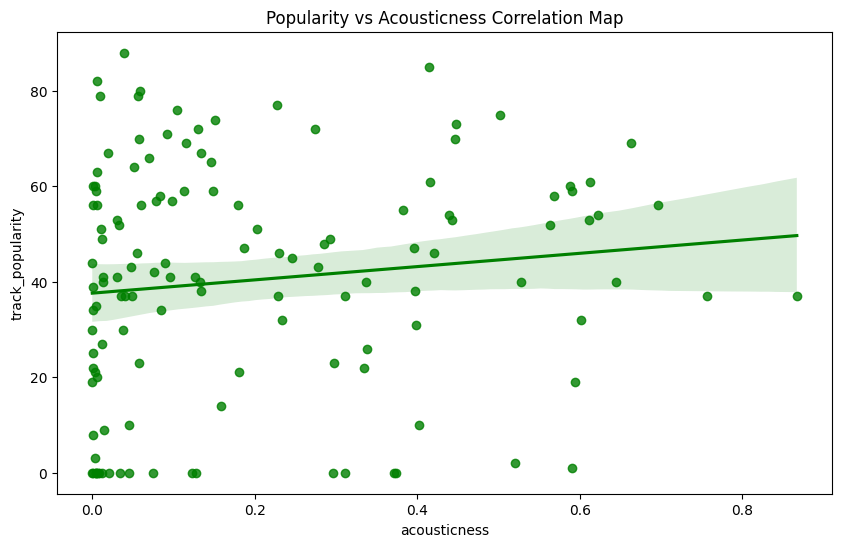

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="track_popularity",x="acousticness",color="g").set(title="Popularity vs Acousticness Correlation Map")

In [22]:
df['dates'] = df.index.get_level_values('track_album_release_date')
df['dates'] = pd.to_datetime(df.dates)
years = df.dates.dt.year


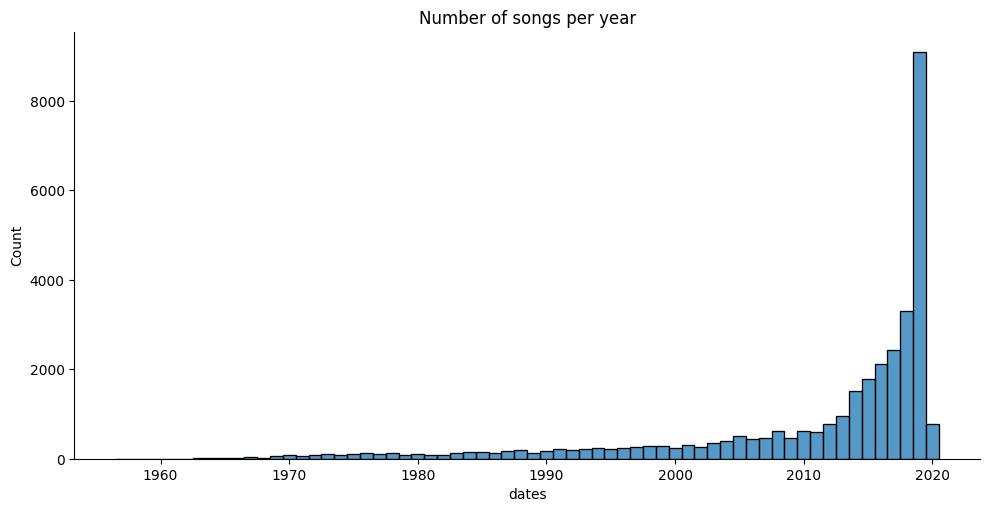

In [23]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Number of songs per year")

<ipython-input-24-ec6349f8cfd4>:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': False}` instead.

  fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, '1957'),
  Text(1, 0, '1958'),
  Text(2, 0, '1960'),
  Text(3, 0, '1961'),
  Text(4, 0, '1962'),
  Text(5, 0, '1963'),
  Text(6, 0, '1964'),
  Text(7, 0, '1965'),
  Text(8, 0, '1966'),
  Text(9, 0, '1967'),
  Text(10, 0, '1968'),
  Text(11, 0, '1969'),
  Text(12, 0, '1970'),
  Text(13, 0, '1971'),
  Text(14, 0, '1972'),
  Text(15, 0, '1973'),
  Text(16, 0, '1974'),
  Text(17, 0, '1975'),
  Text(18, 0, '1976'),
  Text(19, 0, '1977'),
  Text(20, 0, '1978'),
  Text(21, 0, '1979'),
  Text(22, 0, '1980'),
  Text(23, 0, '1981'),
  Text(24, 0, '1982'),
  Text(25, 0, '1983'),
  Text(26, 0, '1984'),
  Text(27, 0, '1985'

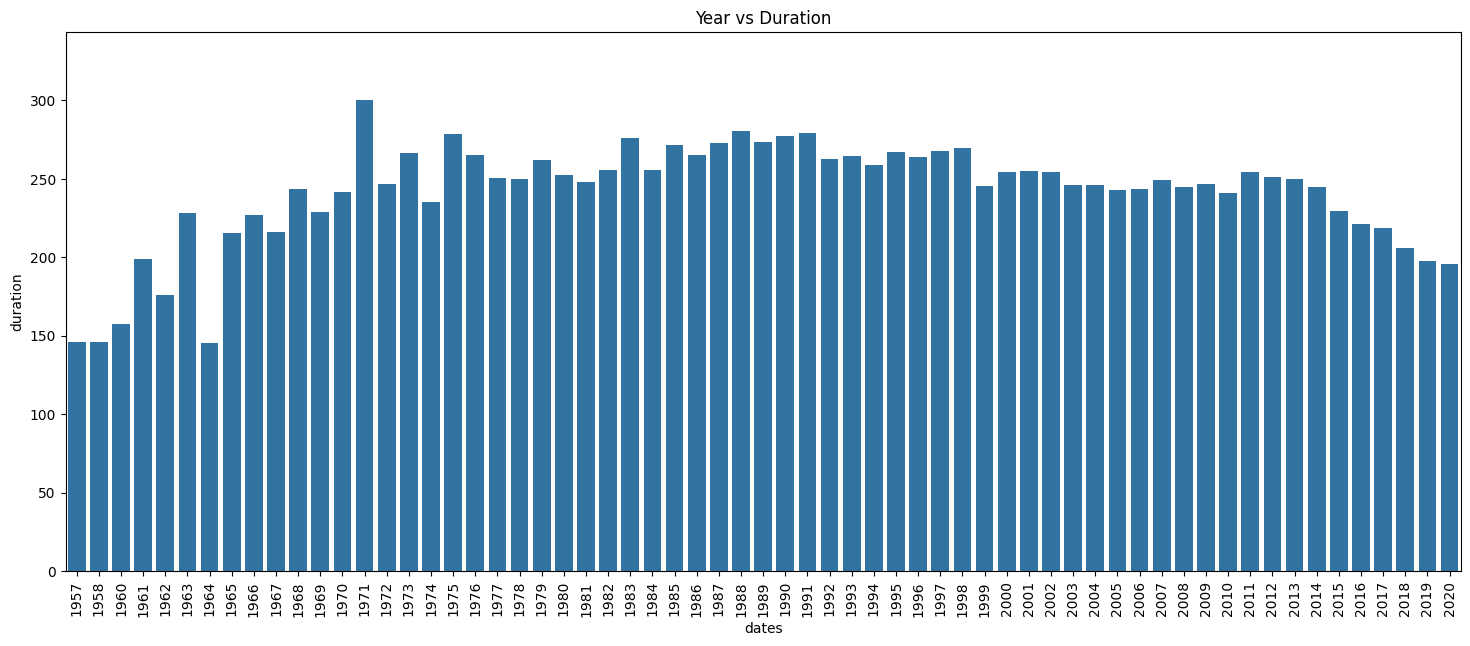

In [24]:
total_dr=df.duration
fig_dims=(18,7)
fig,ax=plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=90)

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

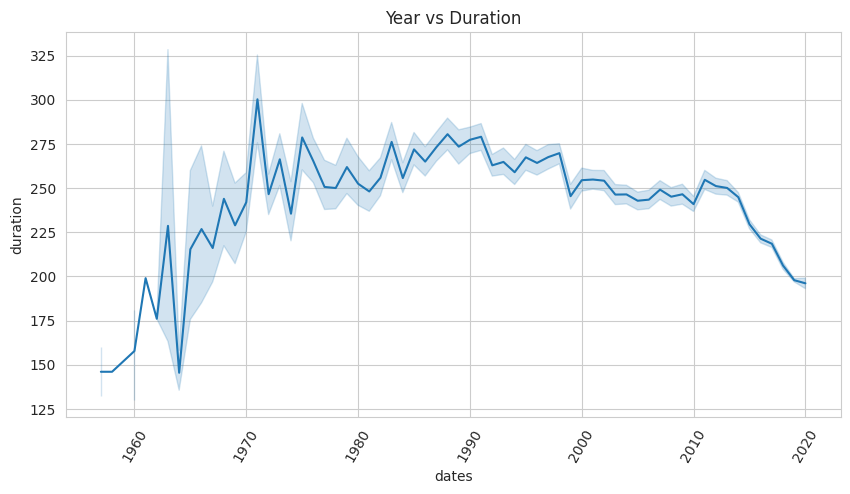

In [25]:
total_dr=df.duration
sns.set_style(style="whitegrid")
fig_dims=(10,5)
fig, ax=plt.subplots(figsize=fig_dims)
fig=sns.lineplot(x=years,y=total_dr,ax=ax).set(title="Year vs Duration")
plt.xticks(rotation=60)

Data Analysis and Visualization based on playlist genre

In [26]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,dates
track_album_release_date,,,,,,,,,,,,,,,,,,,,,
2019-06-14,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,195,2019-06-14
2019-12-13,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,163,2019-12-13
2019-05-07,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,177,2019-05-07
2019-07-19,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169,2019-07-19
2019-05-03,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189,2019-05-03


Text(0, 0.5, 'Playlist_genre')

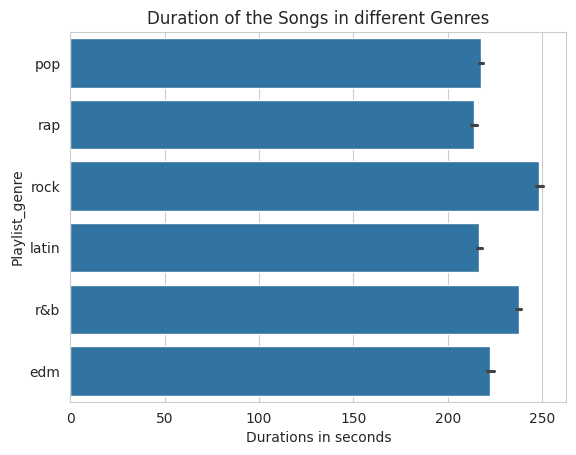

In [27]:
plt.title("Duration of the Songs in different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y="playlist_genre",x="duration",data=df)
plt.xlabel("Durations in seconds")
plt.ylabel("Playlist_genre")

[Text(0.5, 1.0, 'Top 5 Genres by popularity ')]

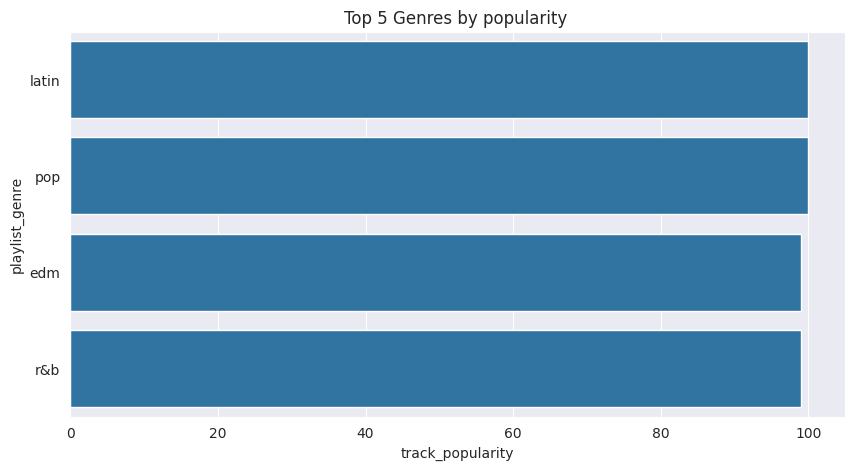

In [28]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df.sort_values("track_popularity",ascending=False).head(5)
sns.barplot(y="playlist_genre",x="track_popularity",data=famous).set(title="Top 5 Genres by popularity ")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


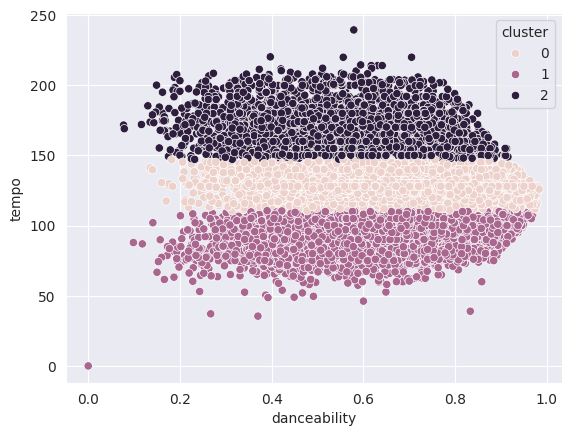

In [29]:
X = df[['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='danceability', y='tempo', hue='cluster', data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


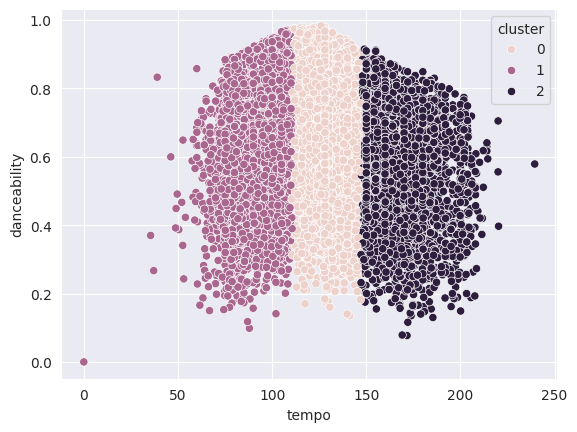

In [31]:
X = df[['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='tempo', y='danceability', hue='cluster', data=df)
plt.show()

In [32]:
y=df['track_popularity']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [35]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [36]:
predicted_result = model.predict(X_test)

In [37]:
predicted_result

array([36.77      , 24.9       , 41.33      , ..., 41.1       ,
       52.852     , 28.47666667])

In [38]:
model.score(X_test,y_test)

0.28589426741873103

In [39]:
#final result
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
predictions = model.predict(X_test)

In [41]:
predictions

array([61, 17, 52, ...,  0, 55,  0])

In [42]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(classification_report(y_test, predictions))
final= mean_squared_error(y_test, predicted_result)
print(f'Mean Squared Error: {final}')

Accuracy: 0.24546977310796406
              precision    recall  f1-score   support

           0       0.14      0.64      0.23       559
           1       0.12      0.10      0.11       101
           2       0.27      0.14      0.18        86
           3       0.31      0.12      0.17        76
           4       0.17      0.07      0.10        44
           5       0.11      0.05      0.07        39
           6       0.29      0.06      0.10        33
           7       0.46      0.14      0.22        42
           8       0.19      0.09      0.12        34
           9       0.16      0.08      0.11        36
          10       0.22      0.13      0.17        30
          11       0.25      0.14      0.18        29
          12       0.31      0.12      0.17        34
          13       0.42      0.14      0.21        56
          14       0.31      0.10      0.15        42
          15       0.20      0.07      0.11        40
          16       0.50      0.20      0.29        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
